In [ ]:
from openai import OpenAI

# API
client =

#prompt usuario
tareas = """
Tengo que comprar comida para el gato, preparar una presentación para el jueves, llamar a un cliente sobre el proyecto,
estudiar para el examen de matemáticas que es el viernes, enviar un informe urgente, revisar el email,
planificar una reunión, hacer ejercicio, leer un capítulo nuevo de mi novela favorita y pagar la factura de luz que vence en 3 días.
Ayudame a organizarlo todo
"""
#zero
def zero_shot(tareas):

    prompt = f"""
    Tengo la siguiente lista de tareas desordenada:

    {tareas}

    Organiza estas tareas en una lista priorizada por urgencia e importancia y dame un orden lógico para realizarlas.
    La salida debe ser clara y fácil de entender."""
    response = client.chat.completions.create(
        model="",
        messages=[{"role": "user", "content": prompt}]
    )

    return response.choices[0].message.content

zero = zero_shot(tareas)
print("Zero shot")
print(zero)

#one
def one_shot(tareas):

    prompt = f"""Segun el siguiente ejemplo para organizar tareas:

Tareas de ejemplo:
Necesito hacer: revisar documento, llamar a proveedor, enviar presupuesto, ver el ultimo episodio de mi novela

Salida esperada:
Tareas urgentes (hoy):
- Enviar presupuesto
- Llamar a proveedor

Tareas importantes (esta semana):
- Revisar documento

Tareas poco importantes(sin limite de tiempo):
- Ver el ultimo episodio de mi novela

Ahora, aplicá el mismo formato a la siguiente lista de tareas del usuario para organizar las tareas por orden de importancia

la peticion/tareas son: {tareas}"""
    response = client.chat.completions.create(
        model="",
        messages=[{"role": "user", "content": prompt}]
    )

    return response.choices[0].message.content


one = one_shot(tareas)
print("One Shot")
print(one)

#few
def few_shot(tareas):

    prompt = f"""Segun estos dos ejemplos de cómo convertir una lista desordenada en un plan de acción estructurado.
    quiero que apliques este estilo a la nueva lista de tareas del usuario.

Ejemplo 1:
Usuario: Tengo que comprar leche, estudiar ingles, llamar al banco, y preparar la cena.
Salida:
Hoy (urgente):
- Llamar al banco (antes de las 17 hs)
- Comprar leche

Esta semana:
- Estudiar ingles (martes y jueves)
- Preparar cena (no urgente)

Ejemplo 2:
Usuario: Reunion mañana a las 10, enviar informe al cliente, leer el capítulo 5, y reservar un salon de fiestas para mi cumpleaños."
Salida:
Mañana:
- 10:00 – Reunion
- Después de la reunión – Enviar informe al cliente

Próximos días:
- Leer capítulo 5 (antes del viernes)
- Reservar salon de fiestas (fecha límite: fin de mes)

Ahora, procesa la siguiente entrada del usuario siguiendo este estilo, la entrada es:{tareas}
    """
    response = client.chat.completions.create(
        model="",
        messages=[{"role": "user", "content": prompt}]
    )

    return response.choices[0].message.content

few = few_shot(tareas)
print("Few Shot")
print(few)

Resultado de las Ejecuciones:

Zero Shot – Respuesta del modelo (Deepseek)

**Lista priorizada de tareas (por urgencia e importancia):**

1. **Enviar informe urgente** – Lo más prioritario, debe hacerse hoy.
2. **Pagar factura de luz** – Vence en 3 días, conviene hacerlo pronto para evitar recargos.
3. **Preparar presentación para el jueves** – Tiene fecha fija, requiere planificación.
4. **Estudiar para el examen de matemáticas (viernes)** – Examen en pocos días, requiere dedicación.
5. **Llamar a un cliente sobre el proyecto** – Importante para el avance del trabajo, agendarlo con el cliente.
6. **Planificar una reunión** – Depende de la disponibilidad de otros, coordinarla con antelación.
7. **Comprar comida para el gato** – Tarea doméstica, puede hacerse en cualquier momento, pero no postergar demasiado.
8. **Hacer ejercicio** – Importante para la salud, pero sin fecha límite; programarlo en la rutina.
9. **Revisar el email** – Tarea diaria, se puede combinar con momentos de menor concentración.
10. **Leer un capítulo nuevo de mi novela favorita** – Ocio, para momentos de descanso.

**Orden lógico sugerido:**
- Hoy: enviar informe urgente, pagar factura (si es posible online), llamar al cliente.
- Mañana: preparar presentación, estudiar para el examen.
- Resto de la semana: comprar comida, hacer ejercicio, planificar reunión, revisar email diariamente, leer en ratos libres.



---



One Shot – Respuesta del modelo (DeepSeek)

One Shot

**Tareas urgentes (hoy):**
- Enviar informe urgente
- Llamar a un cliente sobre el proyecto (si es posible hoy)

**Tareas importantes (esta semana):**
- Pagar factura de luz (vence en 3 días)
- Preparar presentación para el jueves
- Estudiar para el examen de matemáticas (viernes)
- Planificar una reunión (definir fecha con el equipo)

**Tareas poco importantes (sin límite de tiempo):**
- Comprar comida para el gato
- Revisar el email (puede ser diariamente, pero sin urgencia)
- Hacer ejercicio
- Leer un capítulo nuevo de mi novela favorita


---


Few Shot – Respuesta del modelo (DeepSeek)

Few Shot

**Hoy (urgente):**
- Enviar informe urgente (prioridad máxima)
- Pagar factura de luz (vence en 3 días, mejor hoy para no olvidar)

**Mañana:**
- Llamar a un cliente sobre el proyecto (agendar con el cliente)
- Comprar comida para el gato (aprovechar salida)

**Próximos días (antes del viernes):**
- Preparar presentación para el jueves (dedicar tiempo el miércoles)
- Estudiar para el examen de matemáticas (viernes) – planificar sesiones de estudio
- Planificar una reunión (coordinar con el equipo)

**Sin fecha definida (pero recomendable incluir en rutina):**
- Revisar el email (diariamente, 15 min)
- Hacer ejercicio (3 veces por semana)
- Leer un capítulo nuevo de mi novela favorita (tiempo libre)

Comparativa:
Zero-shot:
Es el mas eficiente en consumo de tokens, ideal para tareas simples donde no se requiere un formato específico, aunque puede ser menos estructurado.

One-shot
Es el más equilibrado: consume pocos tokens adicionales pero garantiza un formato claro y consistente, siendo la mejor opción para la mayoria de los casos de uso.

Few-shot
Es el mas preciso para tareas complejas, pero tambien el menos eficiente en cuanto a consumo de tokens; se justifica solo cuando se necesita alta calidad o patrones específicos.

Para la entrega final se utilizara un solo modelo de texto (One-shot) por ser el mas equilibrado entre consumo de tokens y calidad de respuesta

In [ ]:
def generar_imagen(plan):

    prompt_imagen = f"""
    Crea un diagrama organizativo profesional basado en el siguiente plan:
    {plan}
    Estilo minimalista, fondo blanco, estructura clara tipo diagrama de flujo.
    """
    response = client.images.generate(
        model="",
        prompt=prompt_imagen,
        size="1024x1024"
    )

    return response.data[0].url

imagen_url = generar_imagen(one)

print("Imagen generada:")
print(imagen_url)


Generamos la Imagen usando ChatGPT

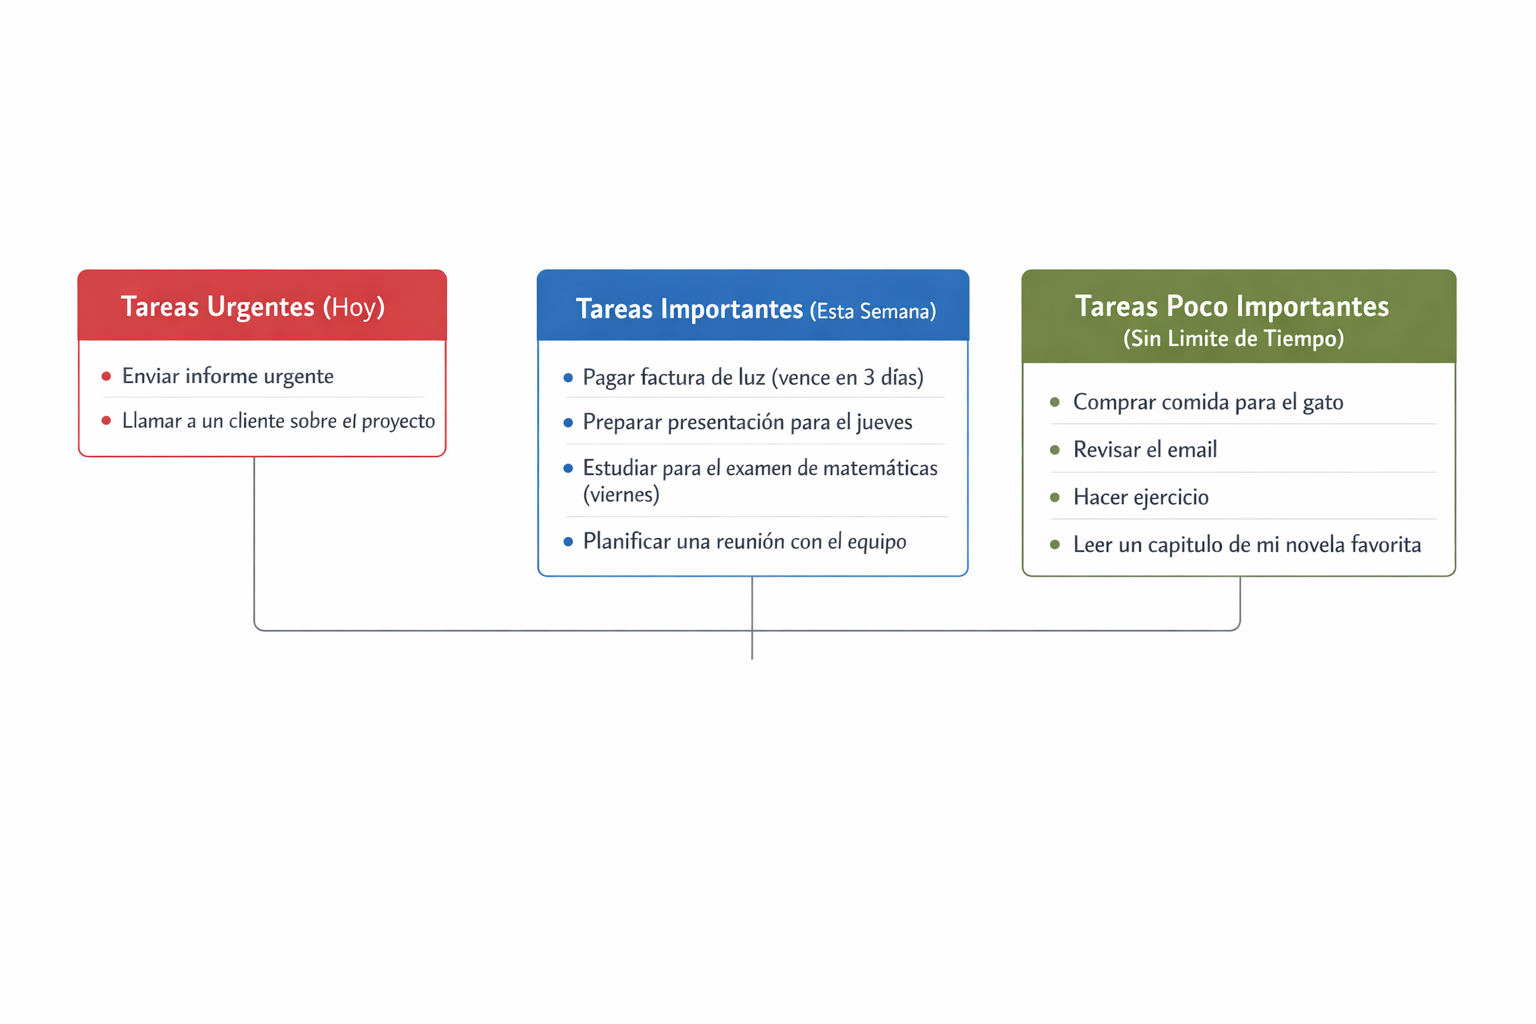